# Calculus

In this lesson, I'll cover the basics of the calculus of a single variable. Calculus is often divided into different areas, those being:

- Infinitesimals: How to manipulate numbers that are "infinitely" small.
- Differentiation: How one variable changes continuously in response to one or more other variables.
- Integration: How to add up infinitely many small numbers to get a finite number.
- Limits: What happens as one value gets closer to another.

Not all of these topics are equally important to know for machine learning, but I'll try to at least touch on each topic a little bit. Let's get started.

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from utils.math_ml import *
import warnings

warnings.filterwarnings('ignore')

## Infinitesimals

Perhaps most fundamental to what calculus is is the idea of an infinitely small number, usually called an *infinitesimal*. A positive **infinitesimal** is a *hyperreal number* $\varepsilon$ that's much smaller than any positive real number $x$,

$$0 < \varepsilon \ll x$$

A negative infinitesimal is defined similarly, except with the signs all flipped, $x \ll \varepsilon < 0$. I say "hyperreal number" because infinitesimals aren't technically real numbers. They extend the number line in a sense. 

Thankfully we won't really have to worry about this technical distinction in this book. For practical purposes, think of infinitesimals as a really, really small numbers. When we say infinitesimal in practice, we usually mean a really small number like $\varepsilon = 10^{-10}$. This means $\varepsilon^2 = 10^{-20}$. If we take say $x=1$, then $\varepsilon=10^{-10}$ is really small compared to $x$, but $\varepsilon^2 = 10^{-20}$ is really really small compared to $x$, so small that it might as well be zero,

$$\varepsilon^2 \approx 0.$$

A computer wouldn't even be able to tell the difference really between $x$ and $x + \varepsilon^2$.

In [2]:
x = 1
epsilon = np.float64(1e-10)
print(f'x = {x}')
print(f'epsilon = {epsilon}')
print(f'x + epsilon = {1 - epsilon}')
print(f'epsilon^2 = {epsilon ** 2}')
print(f'x + epsilon^2 = {1 - epsilon ** 2}')

x = 1
epsilon = 1e-10
x + epsilon = 0.9999999999
epsilon^2 = 1.0000000000000001e-20
x + epsilon^2 = 1.0


The inverse of an infinitesimal must evidently be a really big number $N = \frac{1}{\varepsilon}$. These are called *infinitely large* numbers. Technically speaking, a positive **infinitely large** number is a hyperreal number that's much larger than any positive real number $x$,

$$0 \leq x \ll N.$$

Similarly for infinitely large negative numbers, we'd have $N \ll x < 0$.

If in practice we'd think of an infinitesimal as a tiny number like $\varepsilon = 10^{-10}$, we'd think of an infinitely large number a really large number like $N=10^{10}$. If $N$ is really large, then $N^2$ is really really large, so large that it might as well be infinity,

$$N^2 \approx \infty.$$

If $x=1$, then $x + N \approx N$. As far as a computer is concerned you can't really even tell the difference.

In [3]:
x = 1
N = np.float64(1e10)
print(f'x = {x}')
print(f'N = {N}')
print(f'x + N = {1 + N}')
print(f'N^2 = {N ** 2}')
print(f'x + N^2 = {1 + N ** 2}')

x = 1
N = 10000000000.0
x + N = 10000000001.0
N^2 = 1e+20
x + N^2 = 1e+20


## Differential Calculus

### Differentials and Derivatives

To make it easier to tell what's an infinitesimal with respect to what, we often use the notation of *differentials*. If $x$ is some variable, we'd denote any infinitesimal added to it by the symbol $dx$, called the **differential** of $x$. If $y=f(x)$ is some function of $x$, then the differential with respect to $y$ is the amount that $y$ changes if we change $x$ to $x+dx$,

$$dy = f(x+dx) - f(x).$$

If it helps, you can think of $dx$ as meaning "a little bit of $x$", and $dy$ as meaning "a little bit of $y$".

Let's look at an example. Suppose $y=x^2$. What is $dy$? Evidently, we'd have

$$dy = f(x + dx) - f(x) = (x+dx)^2 - x^2 = (x^2 + 2xdx + dx^2) - x^2 = 2xdx + dx^2.$$

This is how much $y$ changes if we change $x$ by $dx$. Now, if $dx$ is infinitesimal, $dx^2 \approx 0$, which means

$$dy \approx 2xdx.$$

Notice how if $dx$ is infinitesimal, then $dy$ will evidently be an infinitesimal too. If we change $x=1$ by a really small amount $dx=10^{-10}$, then we'd change $y=x^2=1$ by $dy=2xdx=2 \cdot 10^{-10}$, which is also a really small change.

The ratio of these differentials says something about the rate that $y$ changes if we change $x$. It's called the *derivative* of $y=x^2$,

$$\frac{dy}{dx} = 2x.$$

Notice that the derivative is not itself infinitesimal since all the differentials are on the left-hand side. It's a real number, on the same scale as $x$ and $y$.

Of course, we can calculate these things numerically too. We just have to be careful about floating point roundoff. Since we're subtracting two numbers that are almost equal we'll inevitably get a lot of roundoff if we make $dx$ too small. When coding these things you have to be careful about how small you choose $dx$. I'll take $dx=10^{-5}$ here. If the calculation were exact, we'd expect to get

$$dy=2xdx = 2 \cdot 10^{-5} = 2.00001.$$

But evidently we don't get this exactly. In fact, since $dx^2 = 10^{-10}$, we should expect to start seeing errors around 10 decimal places due to $dx$ not being exactly infinitesimal, which is what we're seeing here.

In [4]:
dx = 1e-5
x = 1
y = 1 ** 2
dy = (1 + dx) ** 2 - y
print(f'dy = {dy}')
print(f'dy/dx = {dy / dx}')

dy = 2.0000100000139298e-05
dy/dx = 2.00001000001393


Let's do another example. Suppose we have the function $y = x^3$. Then we'd have

$$dy = f(x+dx) - f(x) = (x+dx)^3 - x^3 = (x^3 + 3x^2 dx + 3 x dx^2 + dx^3) - x^3 = 3x^2 dx + 3 x dx^2 + dx^3.$$

If $dx$ is infinitesimal, then $dx^2 \approx 0$, which also means $dx^3 \approx 0$. Thus, if $x$ changes by a small amount $dx$, then $y=x^3$ changes by an amount

$$dy = 3x^2 dx.$$

The derivative of $y=x^3$ is again just the ratio of differentials,

$$\frac{dy}{dx} = 3x^2.$$

Here's a numerical calculation to verify this fact. I'll again choose $x=1$ and $dx=10^{-5}$. We should expect to get $dy =3 \cdot 10^{-5}$ and $\frac{dy}{dx} = 3$. To within an error of about $dx^2=10^{-10}$ it seems we do.

In [5]:
dx = 1e-5
x = 1
y = 1 ** 3
dy = (1 + dx) ** 3 - y
print(f'dy = {dy}')
print(f'dy/dx = {dy / dx}')

dy = 3.0000300001109537e-05
dy/dx = 3.000030000110953


In both examples, the amount that $y$ changes if $x$ changes by $dx$ is evidently just the derivative times $dx$,

$$dy = \frac{dy}{dx} dx.$$

The notation makes this fact look pretty trivial, since we can imagine canceling the $dx$ terms on the right to get $dy$. In fact, that's exactly what we're doing.

In general, if $y=f(x)$ is some function that's reasonably well-behaved at a point $x$, then the **differential** of $y$ at that point is

$$dy = f(x+dx) - f(x),$$

and the **derivative** of $y=f(x)$ at that point is given by

$$\frac{dy}{dx} = \frac{f(x+dx) - f(x)}{dx}.$$

This will only be exact when $dx$ is infinitesimal, otherwise we'd have an error on the order of $dx^2$. Notice that both the differential and the derivative are themselves functions of $x$. For this reason, it's common to think of $\frac{d}{dx}$ is some kind of derivative operator and write

$$\frac{dy}{dx} = \frac{d}{dx} f(x), \quad \text{or} \quad \frac{dy}{dx} = f'(x).$$

What exactly did I mean when I said the function $f(x)$ needs to be "reasonably well behaved" at the point $x$? For one thing, the function needs to be **continuous**. Informally, you can think of $f(x)$ as being continuous if you can draw its graph on a piece of paper without lifting your pen. There are no jumps or holes anywhere in the function's graph. More formally, a function is continuous at $x$ if $dy = f(x+dx) - f(x)$ is infinitesimal whenever $dx$ is infinitesimal.

Continuity is just *one* condition necessary for $f(x)$ to be differentiable. It also can't be too jagged in some sense. Derivatives don't make sense at points where there are kinks in the graph. In practice, however, this isn't a huge problem. We can just extend the derivative to be what's called a [subderivative](https://en.wikipedia.org/wiki/Subderivative). With a subderivative, you can roughly speaking take whatever value for the derivative you want at these kinks and it won't make a difference.

Here's a quick python function `diff` that can numerically calculate the derivative of some function $f(x)$ at a point $x$.

In [6]:
def diff(f, x, dx=1e-5):
    dy = f(x + dx) - f(x)
    return dy / dx

f = lambda x: x ** 2
dydx = diff(f, 1)
print(f'dy/dx = {dydx}')

dy/dx = 2.00001000001393


Calculating the derivative this way is called **numerical differentiation**. It turns out, you can reduce the error in numerical differentiation calculations a lot by centering the difference estimate for $dy$,

$$dy=\frac{f\big(x+\frac{dx}{2}\big)-f\big(x-\frac{dx}{2}\big)}{2}.$$ 

It's equivalent to the above function when $dx$ is infinitesimal, but when it's not it reduces the error by a factor of $dx$. For more details, see [here](https://en.wikipedia.org/wiki/Finite_difference).

### Interpreting Derivatives

Since $dy$ is the change in $y$ in response to the change in $x$ by $dx$, the derivative $\frac{dy}{dx}$ evidently represents some kind of rate. It's the rate that $y$ changes in response to small changes in $x$.

Depending on what exactly $y$ and $x$ are we can think of the derivative as representing many different things. Here are some examples:

- If $x$ is the position of some particle and $t$ is time, $\frac{dx}{dt}$ represents the *speed* or *velocity* of that particle at time $t$.
- If $q$ is the quantity of some economic good and $p$ is the price of that good, then $\frac{dq}{dp}$ represents the *elasticity* of that good, i.e. how responsive the good's quantity is to changes in its price.
- If $p$ is the pressure in the atmosphere at a height $z$ from the Earth's surface, then $\frac{dp}{dz}$ represents the *pressure gradient*, a measure of how much pressure varies with altitude.
- If $L$ is the loss function of some machine learning algorithm and $\theta$ is some parameter of the model, then $\frac{dL}{d\theta}$ represents the *loss gradient*, a measure of how sensitive the loss is to changes in that particular parameter.

The derivative also has a useful interpretation when thinking about a function graphically. It represents the *slope* of a function $y=f(x)$ at the point $x$. This follows from the fact that

$$dy = \frac{dy}{dx} dx.$$

If we relax the requirement that $dx$ be infinitesimal, then it's just the difference between two finite points $x - x_0$, which means $dy$ is also the difference between two points $f(x) - f(x_0)$. If we plug these into the above formula and rearrange, it says

$$f(x) \approx f(x_0) + \frac{d}{dx} f(x_0) (x - x_0).$$

If we think of $x_0$ as some fixed point and $x$ as a variable, this is just the equation for a line. It's a line passing through the point $(x_0, f(x_0))$ with a slope $\frac{d}{dx} f(x_0)$. This line is called the **tangent line** of the function at the point $x_0$. To see why let's do a quick example.

Suppose again that $y=x^2$. If we take $x_0=1$, then $f(x_0) = 1$ and $\frac{d}{dx} f(x_0) = 2x_0 = 2$, so we have an equation

$$y \approx 1 + 2(x - 1) = 2x - 1.$$

Let's plot this line along with the function itself to see what's going on. Notice the tangent line is hugging the function at the red point $x_0=1, y_0=1$, and that the slope of the line seems to hug the curve at that point. This is what it means to say that the derivative is the slope of a function at a point. It's the slope of the tangent line passing through that point.

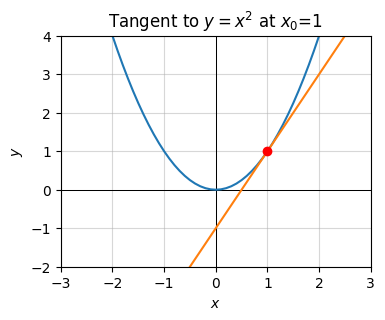

In [11]:
#| fig-align: center
f = lambda x: x ** 2
dfdx = lambda x: 2 * x

x0 = 1
x = np.arange(-3, 3, 0.1)
f_line = lambda x: f(x0) + dfdx(x0) * (x - x0)

plot_function(x, [f, f_line], points=[[x0, f(x0)]], xlim=(-3, 3), ylim=(-2, 4),
              title=f'Tangent to $y=x^2$ at $x_0$={x0}')

Notice a curious fact from this slope interpretation. At the minimum value of the function the slope, in this case $x=0$, the slope is flat, which evidently implies that the derivative at the minimum is zero. We'll exploit this fact in a future lesson when we talk about optimization.

Another way to interpret the equation 

$$f(x) \approx f(x_0) + \frac{d}{dx} f(x_0) (x - x_0)$$

is that the right-hand side is the best linear approximation of the function at the point $x=x_0$. Provided $x \approx x_0$, we can well-approximate $f(x)$ by its tangent line. Another way of saying the same thing is that if we zoom in enough on the plot we can't tell that the function isn't linear.

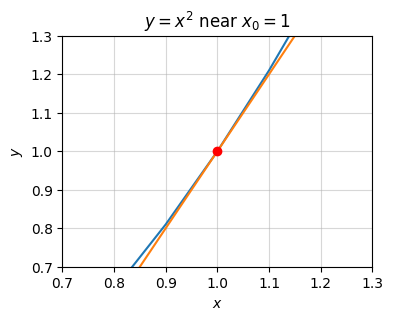

In [15]:
#| fig-align: center
plot_function(x, [f, f_line], points=[[x0, f(x0)]], xlim=(0.7, 1.3), ylim=(0.7, 1.3),
              title=f'$y=x^2$ near $x_0=1$')

### Second Differentials

Differentials and derivatives cover the situation when we're interested in changes in a function that are *first-order* in $dx$. But suppose we're interested in changes that are *second-order* in $dx$? This leads us to the notion of second differentials. If $dx^2$ is a second-order differential change in $x$, then $d^2y = d(dy)$ is a second-order differential change in $y=f(x)$. Using the fact that $dy=f(x+dx)-f(x)$, it's not too hard to show that

$$d^2 y  = f(x+dx)-2f(x)+f(x-dx).$$

The ratio of second differentials is called the **second-derivative** of $y$ with respect to $x$,

$$\frac{d^2 y}{dx^2} = \frac{f(x+dx)-2f(x)+f(x-dx)}{dx^2}.$$

As with the first derivative $\frac{dy}{dx}$, this equality will only be exact when $dx$ is infinitesimal. Otherwise there will be an error of order $dx^3$.

Let's do a quick example. Consider again the cubic function $y=x^3$. I already showed its first derivative is the function $\frac{dy}{dx} = 3x^2$. Let's see what its second derivative is. Evidently, for $d^2y$ we have

\begin{align*}
d^2 y &= f(x+dx)-2f(x)+f(x-dx) \\
&= (x+dx)^3 - 2x^3 + (x-dx)^3 \\
&= (x^3 + 3x^2dx + 3xdx^2 + dx^3) - 2x^3 + (x^3 - 3x^2dx + 3xdx^2 - dx^3) \\
&= 6xdx^2.
\end{align*}

Dividing both sides by $dx^2$, the second derivative of $y=x^3$ is evidently just $\frac{d^2 y}{dx^2} = 6x$. We can actually see this in a simpler way. Notice that

$$\frac{d^2 y}{dx^2} = \frac{d}{dx} \frac{dy}{dx}.$$

That is, it's just the derivative of the derivative. Since we already knew $dy = 3x^2dx$ and $d(x^2)=2xdx$, we could just have done

\begin{align*}
d^2 y = d(dy) &= d(3x^2dx) \\
&= 3d(x^2)dx \\
&= 3(2xdx)dx \\
&= 6xdx^2. \\
\end{align*}

Just like the first derivative is a function of $x$, so is the second derivative. For this reason we'd also often write it as

$$\frac{d^2 y}{dx^2} = \frac{d^2}{dx^2} f(x) = f''(x).$$

To see how the second derivative arises we need to ask what happens if we want to approximate a function $y=f(x)$ not just with a line, but with a parabola. It turns out that if we want to approximate the function with a parabola about some point $x=x_0$ we'd use something like this,

$$f(x) \approx f(x_0) + \frac{d}{dx} f(x_0) (x - x_0) + \color{red}{\frac{1}{2} \frac{d^2}{dx^2} f(x_0) (x - x_0)^2}.$$

The new term is shown in red. It's quadratic in $x-x_0$ and proportional to the second derivative of $y=f(x)$ at the point $x_0$. We can imagine writing it in a form

$$y = a(x-x_0)^2 + b(x-x_0) + c.$$

This gives the equation of a parabola with vertex at $\big(x_0-\frac{b}{2a}, (x_0-\frac{b}{2a})^2\big)$. Evidently, the *curvature* of the parabola is determined by the coefficient $a = \frac{1}{2} \frac{d^2}{dx^2} f(x_0)$. This means that the second derivative is a measure of the function's *curvature* around a point. The larger the second derivative is, the steeper the parabola at that point will be, and hence the steeper the function's curvature will be.

Here's an example. Suppose we have the function $y = x^3 + 5x^2$, and we wanted to approximate the function with a parabola about the point $x=1$. The approximating parabola turns out to be

$$y = 8(x - 1)^2 + 13(x - 1) + 6.$$

The plot of the function and the approximating parabola is shown below.

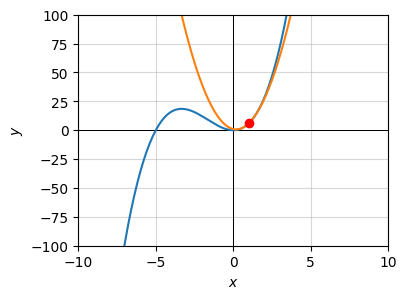

In [23]:
#| fig-align: center
f = lambda x: x ** 3 + 5 * x ** 2
dfdx = lambda x: 3 * x ** 2 + 10 * x
d2fdx2 = lambda x: 6 * x + 10

x0 = 1
x = np.arange(-50, 50, 0.1)

f_parabola = lambda x: f(x0) + dfdx(x0) * (x - x0) + 1/2 * d2fdx2(x0) * (x - x0) ** 2

plot_function(x, [f, f_parabola], points=[[x0, f(x0)]], xlim=(-10, 10), ylim=(-100, 100),
              title=f'')

While this looks like a bad approximation when $x$ is far away from $x=1$, especially if $x$ is negative, if we zoom in closer to $x=1$ we see that it actually does a very good job of approximating the function locally. In the range $[0.5, 1.5]$ you can't even really tell the function isn't parabolic.

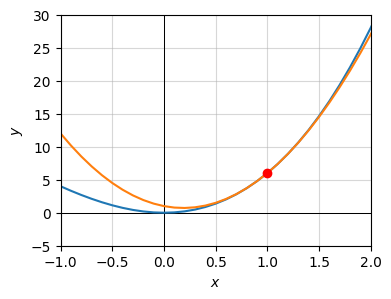

In [27]:
#| fig-align: center
plot_function(x, [f, f_parabola], points=[[x0, f(x0)]], xlim=(-1, 2), ylim=(-5, 30),
              title=f'')

The sign of the second derivative at $x=x_0$ says something about which way the function is curving. If the second derivative is positive, the function is curving *upward* around $x=x_0$. If the second derivative is negative, the function is curving *downward* at $x=x_0$. In the edge case where the second derivative is zero you can't tell. You have to go to higher order terms and look at the sign of those.

There are higher-order differentials and derivatives as well. We can take third differentials, fourth differentials, and so on. Fortunately, these higher terms don't really seem to show up in machine learning, so it's not worth going into them. 

I'll just briefly mention a nice fact. For many functions in practice, we can keep doing the kind of approximation I've been doing indefinitely for higher and higher derivatives. If we take infinitely many terms we get what's called the **Taylor Series Expansion** of $y=f(x)$ about $x=x_0$,

$$f(x) = f(x_0) + \frac{d}{dx} f(x_0) (x - x_0) + \frac{1}{2} \frac{d^2}{dx^2} f(x_0) (x - x_0)^2 + \frac{1}{6} \frac{d^3}{dx^3} f(x_0) (x - x_0)^3 + \cdots$$

By taking more and more terms in the Taylor Series we can get a better and better approximation of a function about a point $x=x_0$ by using higher and higher degree polynomials. The Taylor Series is more easily expressed using summation notation as

$$f(x) = \sum_{n=0}^\infty \frac{1}{n!} \frac{d^n}{dx^n} f(x_0) (x-x_0)^n.$$

### Differential Rules

While we can tediously derive the differentials and derivatives of each function we care about one-by-one, I'll spare you the math and just state them in the table below. In a minute we'll see we can combine these with differential rules to differentiate even more complex functions.

| <div style="width:200px"></div>| <div style="width:200px"></div>| <div style="width:200px"></div>|
|:-----------------------------------|:--------------------------------|:--------------------------------------|
| **Function** | **Differential** | **Derivative** |
| $y = 0$ | $dy = 0$ | $\frac{dy}{dx} = 0$ |
| $y = 1$ | $dy = 0$ | $\frac{dy}{dx} = 0$ |
| $y = x$ | $dy = dx$ | $\frac{dy}{dx} = 1$ |
| $y = x^2$ | $dy = 2xdx$ | $\frac{dy}{dx} = 2x$ |
| $y = \sqrt{x}$ | $dy = \frac{dx}{2\sqrt{x}}$ | $\frac{dy}{dx} = \frac{1}{2\sqrt{x}}$ |
| $y = \frac{1}{x}$ | $dy = -\frac{dx}{x^2}$ | $\frac{dy}{dx} = -\frac{1}{x^2}$ |
| $y = e^x$ | $dy = e^xdx$ | $\frac{dy}{dx} = e^x$ |
| $y = \log{x}$ | $dy = \frac{dx}{x}$ | $\frac{dy}{dx} = \frac{1}{x}$ |
| $y = \sin{x}$ | $dy = \cos{x}dx$ | $\frac{dy}{dx} = \cos{x}$ |
| $y = \cos{x}$ | $dy = -\sin{x}dx$ | $\frac{dy}{dx} = -\sin{x}$ |
| $y = \sigma(x)$ | $dy = \sigma(x)\big(1-\sigma(x)\big)dx$ | $\frac{dy}{dx} = \sigma(x)\big(1-\sigma(x)\big)$ |
| $y = \tanh(x)$ | $dy = \big(1 - \tanh^2(x)\big)dx$ | $\frac{dy}{dx} = \big(1 - \tanh^2(x)\big)$ |
| $y = \text{ReLU}(x)$ | $dy = u(x)dx = [x \geq 0]dx$ | $\frac{dy}{dx} = u(x) = [x \geq 0]$ |

Let's now look at some general rules for differentials and derivatives. The most fundamental rule is that these things are *linear*. That is, if $a, b$ are constant real numbers and $u, v$ are functions,

$$d(au + bv) = adu + bdv, \quad \text{and} \quad \frac{d(au+bv)}{dx} = a \frac{du}{dx} + b \frac{dv}{dx}.$$

It's pretty easy to see this. Suppose $f(x) = au(x) + bv(x)$. Then we'd have

\begin{align*}
d(au + bv) &= f(x + dx) - f(x) \\
&= \big(au(x+dx) + bv(x+dx)\big) - \big(au(x) + bv(x)\big) \\
&= a \big(u(x+dx) - u(x) \big) + b \big(v(x+dx) - v(x) \big) \\
&= adu + bdv.
\end{align*}